In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Countries-exercise.csv')
df

,name,Longitude,Latitude
0,Aruba,-69.982677,12.520880
1,Afghanistan,66.004734,33.835231
2,Angola,17.537368,-12.293361
3,Anguilla,-63.064989,18.223959
4,Albania,20.049834,41.142450
...,...,...,...
236,Samoa,-172.164851,-13.753243
237,Yemen,47.586762,15.909280
238,South Africa,25.083901,-29.000341
239,Zambia,27.774759,-13.458242


In [3]:
# Lấy dữ liệu cần thiết
data = df[['Longitude','Latitude']].values

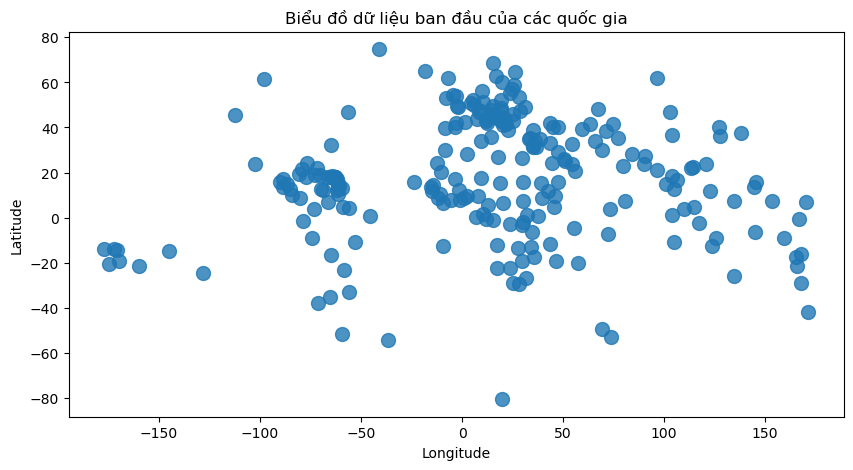

In [4]:
# Biểu đồ dữ liệu khi chưa phân cụm
plt.figure(figsize=(10, 5))
plt.scatter(x=data[:, 0], y=data[:, 1], s=100, alpha=0.8)
plt.title('Biểu đồ dữ liệu ban đầu của các quốc gia')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [5]:
from sklearn.cluster import Birch

# Khởi tạo tham số cho thuật toán
n_clusters = 5 # Số cụm
threshold = 1 # Tham số ngưỡng
birch_model = Birch(threshold=threshold, n_clusters=n_clusters)

# Chạy thuật toán BIRCH với dữ liệu trên
birch_model.fit(data)

Birch(n_clusters=5, threshold=1)

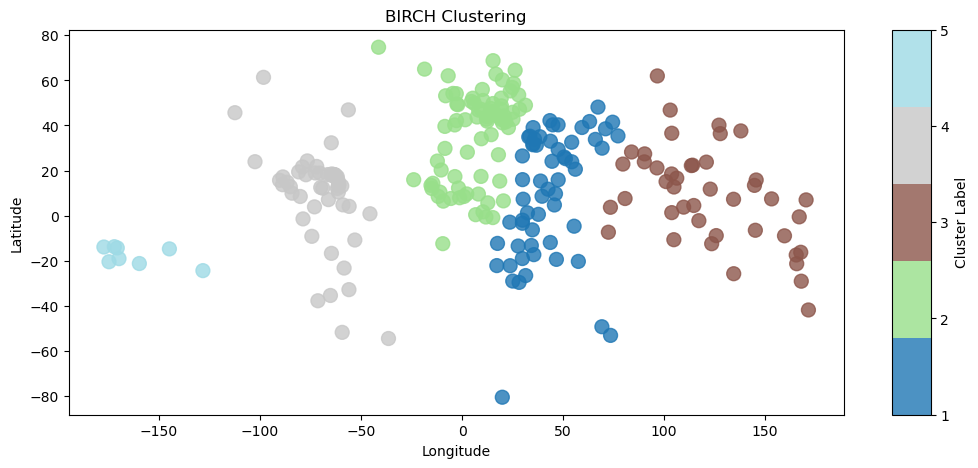

Nhận xét:
1. Dữ liệu được chia ra thành 5 cụm, với mỗi cụm đại diện cho một nhóm quốc gia có sự tương đồng về vị trí địa lý.
2. 5 cụm này có sự tách biệt rõ rệt và không chồng lấn lên nhau, cho thấy khả năng phân cụm của thuật toán BIRCH trong việc phát hiện các nhóm dữ liệu theo tọa độ kinh độ và vĩ độ.
3. Quan sát biểu đồ, ta thấy các cụm phân bố đồng đều theo khu vực địa lý. Các quốc gia gần nhau về kinh độ và vĩ độ thường được gộp vào cùng một cụm.
4. Sự phân cụm này có thể gợi ý về sự tương đồng trong khu vực địa lý giữa các quốc gia, hỗ trợ cho việc nghiên cứu về phân bố dân cư, khí hậu, hay các yếu tố khu vực khác.
5. Tuy nhiên, nếu ta tăng số lượng cụm hoặc giảm tham số ngưỡng (threshold), các cụm sẽ trở nên chi tiết hơn, có thể phù hợp hơn cho các ứng dụng yêu cầu mức độ phân giải cao.


In [6]:
# Vẽ biểu đồ phân cụm
plt.figure(figsize=(12.5, 5))
labels = birch_model.predict(data)
colors = plt.cm.get_cmap('tab20', n_clusters)
scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=colors, marker='o', s=100, alpha=0.8)
plt.title('BIRCH Clustering')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters), aspect=10)
cbar.set_label('Cluster Label')
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'{i + 1}' for i in range(n_clusters)])
plt.show()

print('Nhận xét:')
print(f'1. Dữ liệu được chia ra thành {n_clusters} cụm, với mỗi cụm đại diện cho một nhóm quốc gia có sự tương đồng về vị trí địa lý.')
print(f'2. {n_clusters} cụm này có sự tách biệt rõ rệt và không chồng lấn lên nhau, cho thấy khả năng phân cụm của thuật toán BIRCH trong việc phát hiện các nhóm dữ liệu theo tọa độ kinh độ và vĩ độ.')
print('3. Quan sát biểu đồ, ta thấy các cụm phân bố đồng đều theo khu vực địa lý. Các quốc gia gần nhau về kinh độ và vĩ độ thường được gộp vào cùng một cụm.')
print('4. Sự phân cụm này có thể gợi ý về sự tương đồng trong khu vực địa lý giữa các quốc gia, hỗ trợ cho việc nghiên cứu về phân bố dân cư, khí hậu, hay các yếu tố khu vực khác.')
print('5. Tuy nhiên, nếu ta tăng số lượng cụm hoặc giảm tham số ngưỡng (threshold), các cụm sẽ trở nên chi tiết hơn, có thể phù hợp hơn cho các ứng dụng yêu cầu mức độ phân giải cao.')

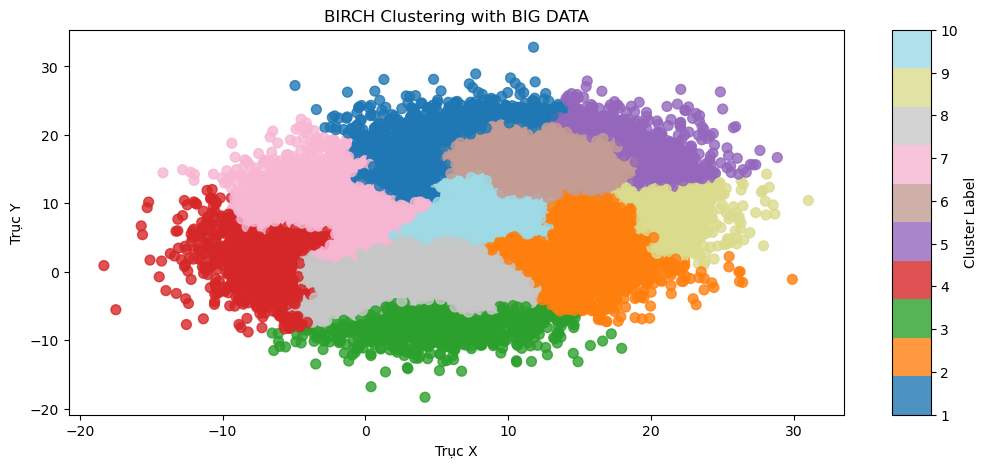

Nhận xét:
1. Với tập dữ liệu lớn gồm 100,000 điểm từ hai cụm (cluster_1 và cluster_2), BIRCH đã chia dữ liệu thành 10 cụm nhỏ và thời gian chạy thuật toán rất nhanh. Điều này cho thấy khả năng của BIRCH trong việc xử lý hiệu quả dữ liệu lớn, nhờ vào cách tổ chức cây phân cấp.
2. Mặc dù dữ liệu được tạo từ hai cụm phân bố (ở tọa độ [4,4] và [10,10]), BIRCH đã phân chia thành 10 cụm dựa trên mật độ điểm, tạo nên sự phân cụm chi tiết hơn trong từng vùng.
3. Biểu đồ cho thấy mô hình đã phân chia dữ liệu thành nhiều cụm tương đối cân bằng. Các cụm trong mỗi khu vực ban đầu có thể được xem như các nhóm con, phản ánh cấu trúc nội bộ của dữ liệu.
4. Với tham số ngưỡng (threshold) là 1,  BIRCH xác định các cụm nhỏ có mật độ cao, từ đó tạo ra phân vùng chi tiết, điều này có thể hữu ích trong các ứng dụng như phát hiện khu vực có mật độ cao trong các tập dữ liệu lớn.


In [9]:
# Chạy thử với tập dữ liệu lớn:

np.random.seed(42)
cluster_1 = np.random.normal(loc=[4, 4], scale=5.0, size=(50000, 2))
cluster_2 = np.random.normal(loc=[10, 10], scale=5.0, size=(50000, 2))
data = np.vstack([cluster_1, cluster_2])

# Khởi tạo mô hình BIRCH
n_clusters = 10
birch_model = Birch(threshold=1, n_clusters=n_clusters)

# Chạy mô thuật toán BIRCH
birch_model.fit(data)

# Vẽ biểu đồ phân cụm
plt.figure(figsize=(12.5, 5))
labels = birch_model.predict(data)
colors = plt.cm.get_cmap('tab20', n_clusters)
scatter = plt.scatter(data[:, 0], data[:, 1], c=labels, cmap=colors, marker='o', s=50, alpha=0.8)

plt.title('BIRCH Clustering with BIG DATA')
plt.xlabel('Trục X')
plt.ylabel('Trục Y')

cbar = plt.colorbar(scatter, ticks=np.arange(n_clusters), aspect=10)
cbar.set_label('Cluster Label')
cbar.set_ticks(np.arange(n_clusters))
cbar.set_ticklabels([f'{i + 1}' for i in range(n_clusters)])
plt.show()

print('Nhận xét:')
print(f'1. Với tập dữ liệu lớn gồm 100,000 điểm từ hai cụm (cluster_1 và cluster_2), BIRCH đã chia dữ liệu thành {n_clusters} cụm nhỏ và thời gian chạy thuật toán rất nhanh. Điều này cho thấy khả năng của BIRCH trong việc xử lý hiệu quả dữ liệu lớn, nhờ vào cách tổ chức cây phân cấp.')
print(f'2. Mặc dù dữ liệu được tạo từ hai cụm phân bố (ở tọa độ [4,4] và [10,10]), BIRCH đã phân chia thành {n_clusters} cụm dựa trên mật độ điểm, tạo nên sự phân cụm chi tiết hơn trong từng vùng.')
print('3. Biểu đồ cho thấy mô hình đã phân chia dữ liệu thành nhiều cụm tương đối cân bằng. Các cụm trong mỗi khu vực ban đầu có thể được xem như các nhóm con, phản ánh cấu trúc nội bộ của dữ liệu.')
print('4. Với tham số ngưỡng (threshold) là 1,  BIRCH xác định các cụm nhỏ có mật độ cao, từ đó tạo ra phân vùng chi tiết, điều này có thể hữu ích trong các ứng dụng như phát hiện khu vực có mật độ cao trong các tập dữ liệu lớn.')

In [ ]:
# # BIRCH phụ thuộc vào tham số ngưỡng (threshold) nên ta xây dựng hàm để tính tham số ngưỡng ít nhất cho một số lượng cụm nhất định cần thiết

# def find_optimal_threshold(X, n_clusters, min_threshold=1, max_threshold=10, step=1):
#     best_threshold = None
#     for threshold in np.arange(min_threshold, max_threshold, step):
#         birch_model = Birch(threshold=threshold, n_clusters=n_clusters)
#         birch_model.fit(X)
#         num_clusters = len(np.unique(birch_model.labels_))
#         if num_clusters == n_clusters:
#             best_threshold = threshold
#             break
#     if best_threshold is None:
#         print("Không tìm được threshold tối ưu trong khoảng giá trị đã cho")
#     return best_threshold

In [ ]:
# # Chạy thử việc tìm giá trị ngưỡng (threshold)
# n_clusters_test = 5 # Số lượng cụm mong muốn
# optimal_threshold = find_optimal_threshold(data, n_clusters=n_clusters_test)
# print("Giá trị Threshold nên dùng:", optimal_threshold)